In [1]:
using DimensionalityReduction, PyPlot
Xpca = pca(D)

LoadError: LoadError: LoadError: LoadError: UndefVarError: FloatingPoint not defined
while loading /home/renge/.julia/v0.5/DimensionalityReduction/src/nmf.jl, in expression starting on line 10
while loading /home/renge/.julia/v0.5/DimensionalityReduction/src/DimensionalityReduction.jl, in expression starting on line 7
while loading In[1], in expression starting on line 1

In [7]:
using DimensionalityReduction, Convex, SCS, Images, DataFrames, Colors, FixedPointNumbers, ImageView
set_default_solver(SCSSolver());

In [15]:
path = "./HeadsAndTails/"
files = readdir(path)
n = 100
finalDim = (n,n)
fileInd = rand(1:size(files,1),n)
curfile = joinpath(path,files[1])
temp = convert(Array{Float64,2},convert(Image{Gray},load(curfile)))
temp = Images.imresize(temp,finalDim)
dim = size(temp)
D = zeros(prod(dim), n)
D[:,1] = vec(temp)
for i=2:n
    curfile = joinpath(path,files[fileInd[i]])
    temp = convert(Array{Float64,2},convert(Image{Gray},load(curfile)))
    temp = Images.imresize(temp,finalDim)
    D[:,i] = vec(temp)
end
;

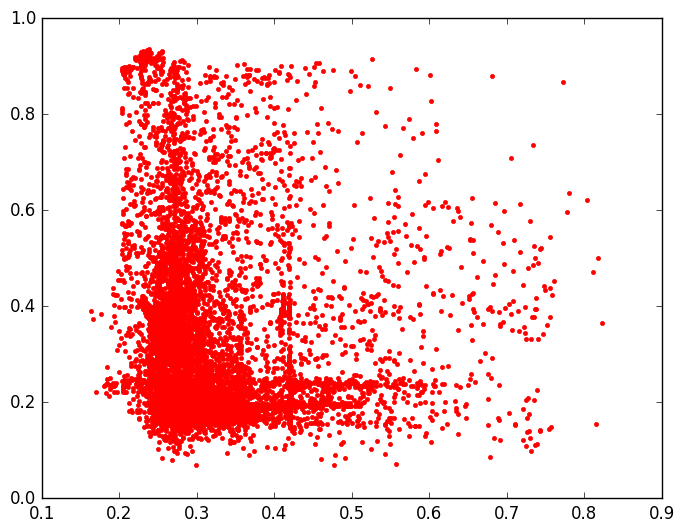

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fda227ffd50>

In [16]:
Xpca = pca(D)
using PyPlot
plot( D[:,1], D[:,2], "r." )  # point cloud



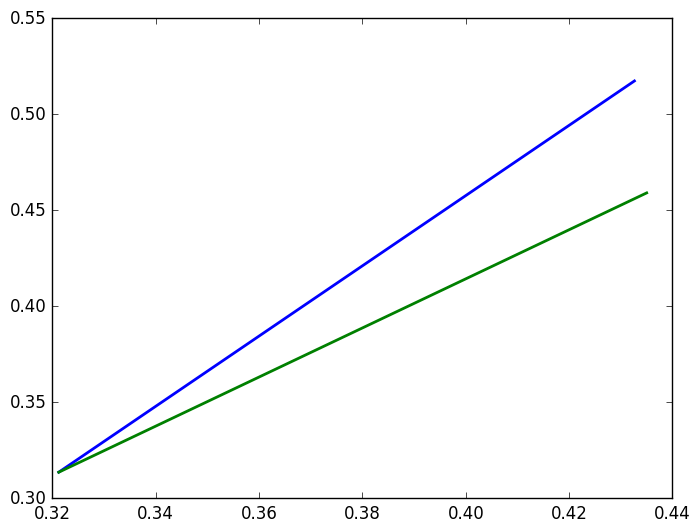

In [17]:
# get data center
ctr = mean( D, 1 )

# plot principal components as lines
#  weight by their standard deviation
PCs = Xpca.rotation
for v=1:2
    weight = Xpca.standard_deviations[v]
    plot( ctr[1] + weight * [0, PCs[1,v]], 
          ctr[2] + weight * [0, PCs[2,v]],
          linewidth = 2)
end

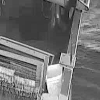

In [31]:
dimension = n*n
testim = convert(Array{Float64,2},Images.imresize(convert(Image{Gray},load("./Test/test1.jpg")), (500,500)))
m = round(Int,(500/n))
Y = zeros(dimension, round(Int,m^2))
counter = 1
for i=1:m
    for j=1:m
        rw = ((i-1)*n+1):(i*n)
        cl = ((j-1)*n+1):(j*n)
        Y[:,counter] = vec(testim[rw,cl])
        counter+=1
    end
end

Y_tilde = Y# - repmat(ctr,1,size(Y,2))

Py = zeros(n,m^2)
for i=m^2
    Py[:,i] = Xpca.scores'*Y_tilde[:,i]
end


Px = vec(PCs)
FF = zeros(m^2,n)
for i=1:m^2
    for j=1:n
        F = norm(Py[:,i]-PCs[:,j])
        FF[i,j] = F;
    end
end
min_FF,index = findmin(FF)

y_ind = div(index,n)+1

grayim(reshape(Y[:,y_ind],(n,n))')


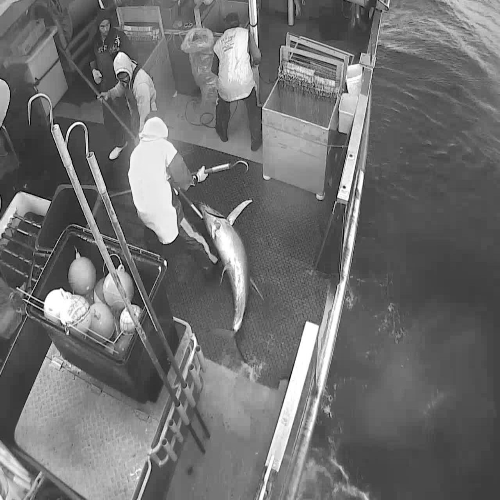

In [33]:
grayim(testim')

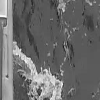

In [34]:
dimension = n*n
testim = convert(Array{Float64,2},Images.imresize(convert(Image{Gray},load("./Test/test6.jpg")), (500,500)))
m = round(Int,(500/n))
Y = zeros(dimension, round(Int,m^2))
counter = 1
for i=1:m
    for j=1:m
        rw = ((i-1)*n+1):(i*n)
        cl = ((j-1)*n+1):(j*n)
        Y[:,counter] = vec(testim[rw,cl])
        counter+=1
    end
end

Y_tilde = Y# - repmat(ctr,1,size(Y,2))

Py = zeros(n,m^2)
for i=m^2
    Py[:,i] = Xpca.scores'*Y_tilde[:,i]
end


Px = vec(PCs)
FF = zeros(m^2,n)
for i=1:m^2
    for j=1:n
        F = norm(Py[:,i]-PCs[:,j])
        FF[i,j] = F;
    end
end
min_FF,index = findmin(FF)

y_ind = div(index,n)+1

grayim(reshape(Y[:,y_ind],(n,n))')


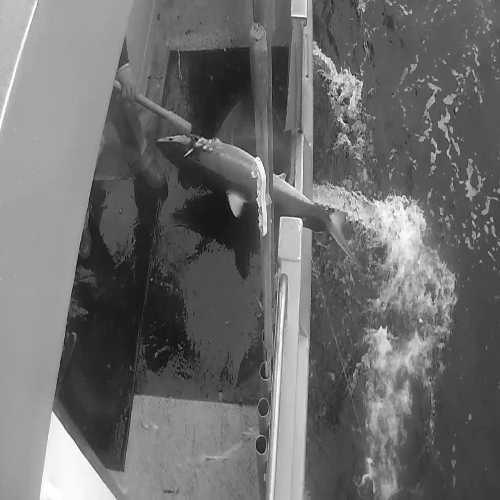

In [35]:
grayim(testim')

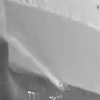

In [44]:
dimension = n*n
testim = convert(Array{Float64,2},Images.imresize(convert(Image{Gray},load("./Test/test8.jpg")), (500,500)))
m = round(Int,(500/n))
Y = zeros(dimension, round(Int,m^2))
counter = 1
for i=1:m
    for j=1:m
        rw = ((i-1)*n+1):(i*n)
        cl = ((j-1)*n+1):(j*n)
        Y[:,counter] = vec(testim[rw,cl])
        counter+=1
    end
end

Y_tilde = Y# - repmat(ctr,1,size(Y,2))

Py = zeros(n,m^2)
for i=m^2
    Py[:,i] = Xpca.scores'*Y_tilde[:,i]
end


FF = zeros(m^2,n)
for i=1:m^2
    for j=1:n
        F = norm(Py[:,i]-PCs[:,j])
        FF[i,j] = F;
    end
end
min_FF,index = findmin(FF)

y_ind = div(index,n)+1

grayim(reshape(Y[:,y_ind],(n,n))')


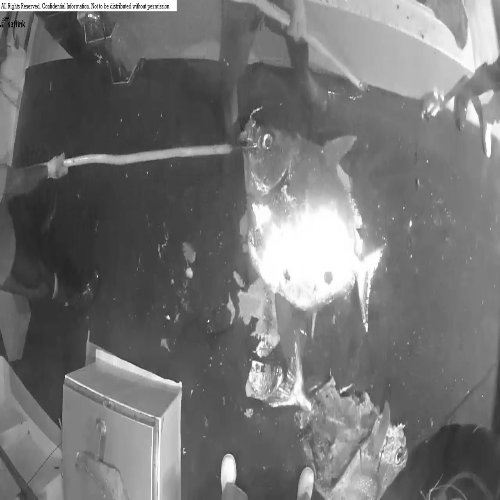

In [45]:
grayim(testim')